## TEST ESTADISTICOS

---

In [1]:
# ============================================
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings

from scipy.stats import skew

from scipy.stats import kurtosistest

from scipy import stats

pd.options.display.max_columns = None

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('../files/life_data_limp.csv', index_col=0)
df.head(2)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


In [4]:
numericas = df.select_dtypes(include= np.number)

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

## 1) ¿Qué diferencia existe el error de tipo I y el error de tipo II?

Error de tipo I: la probabilidad de rechazar la H0 siendo verdadera

Error de tipo II: la probabilidad de aceptar la H0 siendo falsa

## 2) ¿Qué es la asimetría?

La asimetría es la falta de simetría que presenta una distribución teniendo en cuenta la media

Cuando utilizemos el método anterior podemos obtener resultados positivos, negativos o cero.

- **Distributión simétrica**: si el valor es de 0, los datos serán simétricos, y por lo tanto, tienen una distribución normal. 


- **Distribución asimétrica positiva**: si el valor es positivo, los datos serán asimétricos positivos, y por lo tanto, no son normales. 


- **Distribución asimétrica negativa**: si el valor es negativo, los datos serán asimétricos negativos, y por lo tanto, no son normales.

In [11]:
numericas.isnull().sum()

year                                 0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [13]:
for i in numericas.columns:
    if skew(numericas[i])== 0:
        print( f" La variable {i} tiene una distribución simetrica (Es normal)")

    elif skew(numericas[i])> 0:
        print( f" La variable {i} tiene una distribución asimetrica positiva (No es normal)")
    
    elif skew(numericas[i])< 0:
        print( f" La variable {i} tiene una distribución asimetrica negativa (No es normal)")
    else:
        pass

 La variable year tiene una distribución asimetrica negativa (No es normal)
 La variable infant_deaths tiene una distribución asimetrica positiva (No es normal)
 La variable percentage_expenditure tiene una distribución asimetrica positiva (No es normal)
 La variable measles tiene una distribución asimetrica positiva (No es normal)
 La variable under-five_deaths tiene una distribución asimetrica positiva (No es normal)
 La variable hiv/aids tiene una distribución asimetrica positiva (No es normal)


## 3) ¿Es vuestra variable respuesta asimétrica?

In [10]:
skew(df['life_expectancy'])

nan

EL pvalor es mayor a 0.05 por lo tanto rechazamos la H0, y tienen simetria

## 4) ¿Qué tipo de curtosis presenta vuestra variable respuesta?

In [14]:
kurtosistest(df['life_expectancy'])

KurtosistestResult(statistic=nan, pvalue=nan)

EL pvalor es mayor a 0.05 por lo tanto aceptamos la H0, teniendo leptocurtosis. Tiene una morfología afilada.
Los datos son normales con un intervalo de confianza del 95%.

## 5) ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente?

In [15]:
stats.shapiro(df["life_expectancy"])

ShapiroResult(statistic=nan, pvalue=1.0)

Al ser pvalue mayor a 0.05 no podemos rechazar H0, por lo tanto nuestras datos tienen una distribución normal con un intervalo de confianza del 95%.

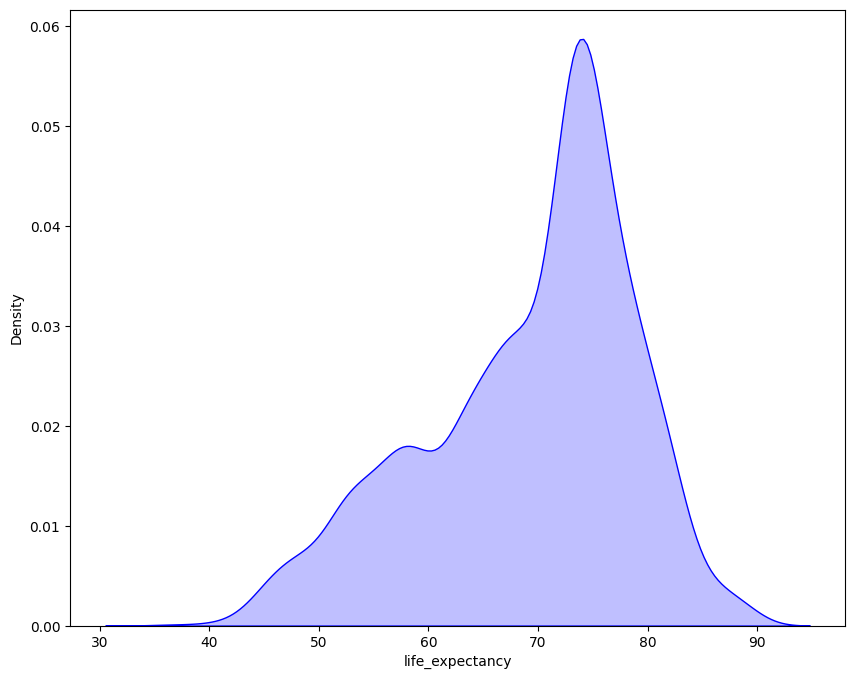

In [16]:
sns.distplot(
    df["life_expectancy"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

Un análisis gráfico muestra cierta normalidad al ser cercana a una campa de Gauss